touching sources
touching detectors


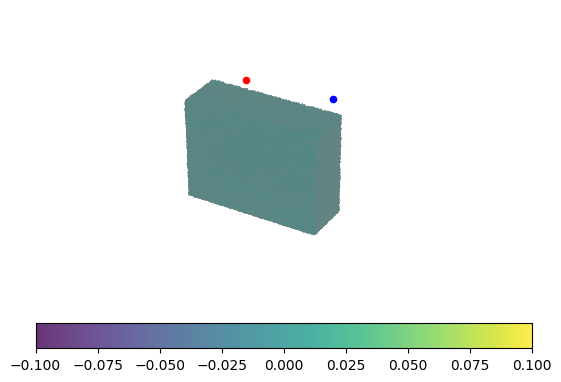

Calculating direct field...
Calculating adjoint field...
Integrating...


c:\Users\akshay.raghuraman\Desktop\NIRFAST\nirfaster-FF\Examples\..\nirfasterff\math.py:754: RuntimeWarning: invalid value encountered in divide
  int_func_tmp /= int_func_tmp.sum()


Calculating direct field...
Calculating adjoint field...
Integrating...


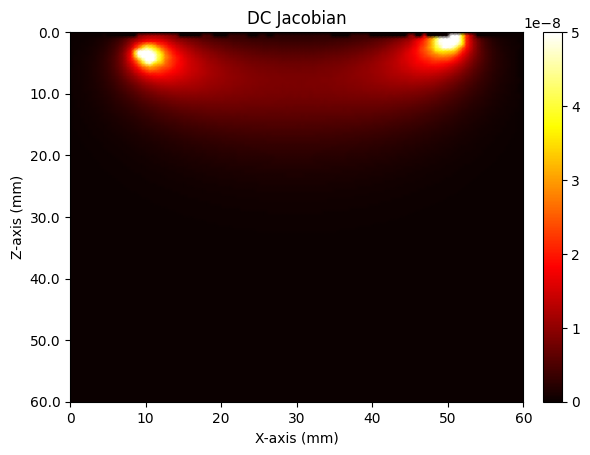

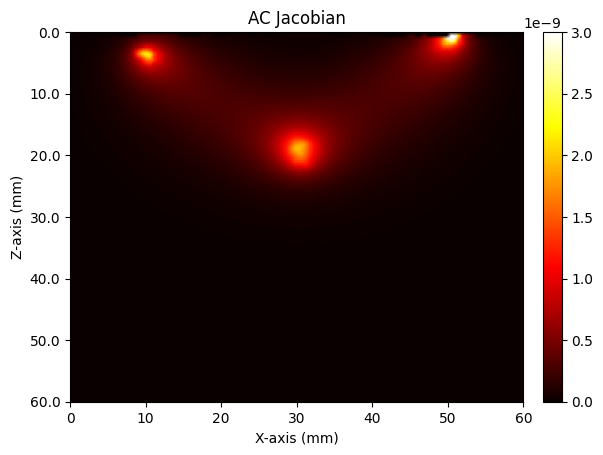

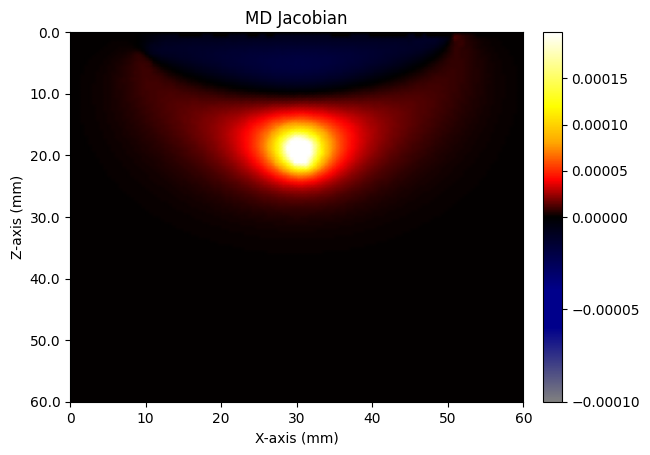

In [1]:
import sys
sys.path.append(r'C:\Users\akshay.raghuraman\Desktop\NIRFAST\nirfaster-FF')
sys.path.append(r'C:\Users\akshay.raghuraman\Desktop\NIRFAST\nirfaster-FF\Examples')

import Mymesh  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
# plotting the US position

tmp1= np.zeros(len(Mymesh.mesh.nodes))
tmp1[Mymesh.selection] = 1
tmp2 = Mymesh.mesh.vol.mesh2grid@tmp1     # mesh to grid interpolation 

tmp2 = tmp2.reshape(1,-1)          # Reshaped to look similiar to a jacobian, shape: (1, 1728000)
tmp3 = (tmp2>0.9)                  # tmp3 holds "True" for array values >0.8.  
indices = np.where(tmp3)[0]        # selection of all indices whose the threshold is >0.8 , or points corresponding to nodes that has an ultrasound pressure value assigned


np.set_printoptions(threshold=np.inf)  # to print arrays fully
print(tmp1.shape) # no. of nodes in mesh space
print(tmp2.shape) # no. of points in grid space/ same as no. of points in jacobian

tmp4 = np.zeros_like(tmp2)
tmp4[indices] = tmp2[indices]


us = tmp4.reshape((Mymesh.xgrid.size, Mymesh.ygrid.size, Mymesh.zgrid.size), order='f') 




(152010,)
(1, 1728000)


In [3]:
# plotting the US position

tmp3= np.zeros(len(Mymesh.mesh.nodes))
tmp3[Mymesh.selection] = 1
tmp4 = Mymesh.mesh.vol.mesh2grid@tmp3     # mesh to grid interpolation 

tmp4 = tmp4.reshape(1,-1)          # Reshaped to look similiar to a jacobian, shape: (1, 1728000)
tmp5 = (tmp4>0.9)                  # tmp5 holds "True" for array values >0.8.  
indices = np.where(tmp5)[0]        # selection of all indices whose the threshold is >0.8 , or points corresponding to nodes that has an ultrasound pressure value assigned


tmp6 = np.zeros_like(tmp4)
tmp6[indices] = tmp4[indices]


us = tmp6.reshape((Mymesh.xgrid.size, Mymesh.ygrid.size, Mymesh.zgrid.size), order='f') 

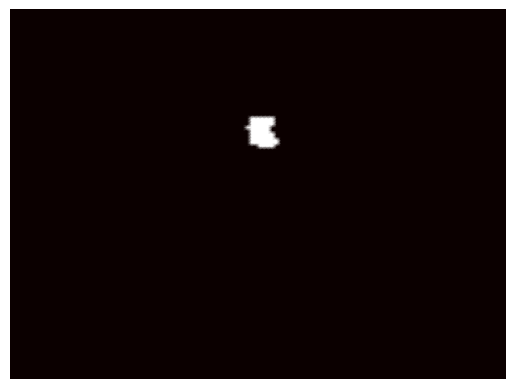

In [4]:
# plt.set_cmap('hot')
# h = plt.imshow(us[60,:,:].T, origin='lower',vmin=0,vmax=1e-4,extent = [0, 60, 0, 60])


#Plot using `pcolormesh` for smooth shading
X, Z = np.meshgrid(np.linspace(0, 60, us.shape[1]),  
                   np.linspace(0, 60, us.shape[2])) 

cmap = plt.get_cmap('hot')  
norm = mcolors.Normalize(vmin=0, vmax=0.5e-7)  
h = plt.pcolormesh(X, Z, us[60, :, :].T, cmap=cmap, norm=norm, shading='gouraud') 
plt.axis('off')  # This hides all axis ticks and labels 
plt.show() 


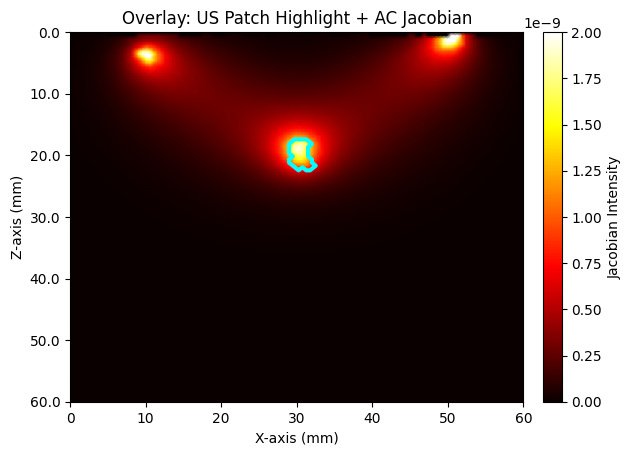

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import numpy as np

# Meshgrid
X, Z = np.meshgrid(np.linspace(0, 60, us.shape[1]),
                   np.linspace(0, 60, us.shape[2]))

fig, ax = plt.subplots()

# 1. Plot US patch (binarized so it's clearly white)
us_patch = us[60, :, :].T
us_mask = (us_patch > 0.1 * us_patch.max()).astype(float)
ax.pcolormesh(X, Z, us_mask, cmap='gray', shading='gouraud', alpha=1)

# 2. Plot Jacobian heatmap underneath
jacobian_data = -Mymesh.banana_ac[60, :, :].T
norm_jac = mcolors.Normalize(vmin=0, vmax=0.2e-8)
jac_plot = ax.pcolormesh(X, Z, jacobian_data, cmap='hot', norm=norm_jac, shading='gouraud', alpha=1)

# 3. Draw a bright boundary around the ORIGINAL mask — no dilation
contour = ax.contour(X, Z, us_mask, levels=[0.5], colors='cyan', linewidths=3)

# 4. Colorbar
cbar = plt.colorbar(jac_plot, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Jacobian Intensity')

# 5. Invert Z-axis
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels(yticks[::-1])

# 6. Final labels
ax.set_xlabel("X-axis (mm)")
ax.set_ylabel("Z-axis (mm)")
ax.set_title("Overlay: US Patch Highlight + AC Jacobian")

plt.show()


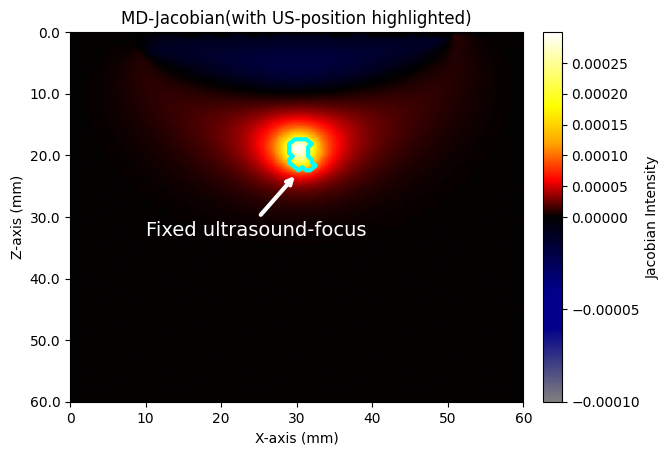

In [6]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import numpy as np

# Meshgrid
X, Z = np.meshgrid(np.linspace(0, 60, us.shape[1]),
                   np.linspace(0, 60, us.shape[2]))

fig, ax = plt.subplots()

# 1. Plot US patch (binarized so it's clearly white)
us_patch = us[60, :, :].T
us_mask = (us_patch > 0.1 * us_patch.max()).astype(float)
ax.pcolormesh(X, Z, us_mask, cmap='gray', shading='gouraud', alpha=1)

# 2. Plot Jacobian heatmap underneath
jacobian_data = -Mymesh.banana_md[60, :, :].T

norm = mcolors.TwoSlopeNorm(vmin=-0.1e-3, vcenter=0, vmax=0.3e-3)

# Create a custom colormap
cmap_colors = [
    (0, "grey"),  
    (0.2, "darkblue"),
    (0.3, "darkblue"),
    (0.5, "black"),     
    (0.6, "red"),    
    (0.7, "orange"),      
    (0.8, "yellow"),
    (1.0, "white")     
]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_hot_blue", cmap_colors, N=500)

jac_plot = ax.pcolormesh(X, Z, jacobian_data, cmap=custom_cmap, norm=norm, shading='gouraud', alpha=1)


# 3. Draw a bright boundary around the ORIGINAL mask — no dilation
contour = ax.contour(X, Z, us_mask, levels=[0.5], colors='cyan', linewidths=3)

# 4. Colorbar
cbar = plt.colorbar(jac_plot, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Jacobian Intensity')

# 5. Invert Z-axis
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.set_yticklabels(yticks[::-1])

# 6. Final labels
ax.set_xlabel("X-axis (mm)")
ax.set_ylabel("Z-axis (mm)")
ax.set_title("MD-Jacobian(with US-position highlighted)")

# Add a horizontal arrow at z = 20 mm, pointing along x-axis
plt.annotate("",
             xy=(30, 37),       # Arrow tip (right side)
             xytext=(25, 30),   # Arrow tail (left side)
             arrowprops=dict(arrowstyle='->', color='white', lw=3))

# Optional: Add label near the arrow
plt.text(10, 27, "Fixed ultrasound-focus", color='white', fontsize=14)



plt.show()



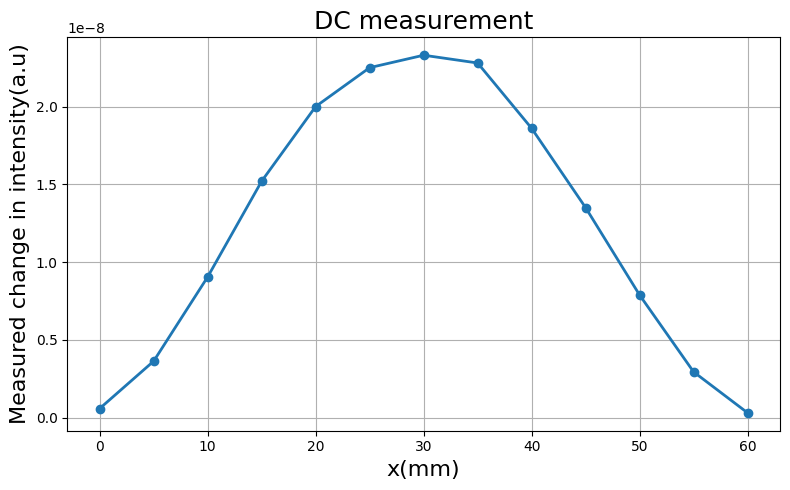

In [7]:
import matplotlib.pyplot as plt

# Data
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
y = [5.84E-10,3.63E-09,9.04571E-09,1.52E-08,2.00E-08,2.25E-08,2.33E-08,2.28E-08,1.86E-08,1.35E-08,7.88E-09,2.94E-09,3.07E-10]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', linewidth=2)
plt.xlabel("x(mm)", fontsize = 16)   # Update label as needed
plt.ylabel("Measured change in intensity(a.u)",fontsize = 16)
plt.title("DC measurement",fontsize = 18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


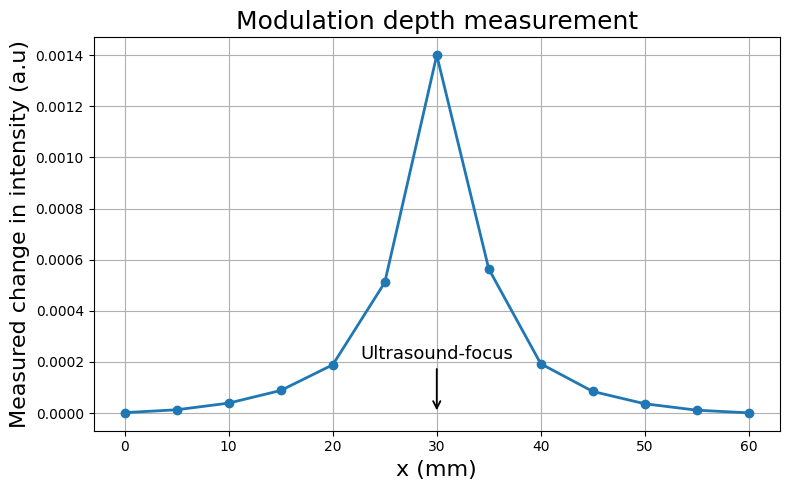

In [8]:
import matplotlib.pyplot as plt

# New data
x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
y = [1.97E-06,1.31E-05,3.92E-05,8.86E-05,1.89E-04,5.11E-04,1.40E-03,5.64E-04,1.93E-04,8.48E-05,3.66E-05,1.15E-05,1.11E-06]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', linewidth=2)
plt.xlabel("x (mm)",fontsize = 16)
plt.ylabel("Measured change in intensity (a.u)",fontsize = 16)
plt.title("Modulation depth measurement",fontsize = 18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)

# Add downward arrow at x=30 mm
plt.annotate("Ultrasound-focus",fontsize = 13,
             xy=(30, 0),                  # Arrow tip on x-axis
             xytext=(30, max(y) * 0.15),  # Arrow base and label height
             ha='center',
             arrowprops=dict(arrowstyle='->', lw=1.3))

plt.tight_layout()
plt.show()


